In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pickle

In [46]:
def inspect_pkl(path='aligned_50.pkl'):
    # Load the pickle file
    with open(path, 'rb') as f:
        data = pickle.load(f)

    # Print top‐level type and keys (if any)
    print(f"Loaded object type: {type(data)}")
    if isinstance(data, dict):
        print("Top‐level keys:", list(data.keys()))

    # For each expected split, show its type and contents
    for split in ['train', 'valid', 'test']:
        print(f"\n=== {split.upper()} ===")
        if split not in data:
            print("  (missing)")
            continue
        part = data[split]
        print(f"  Type: {type(part)}")
        if isinstance(part, dict):
            print("  Keys:", list(part.keys()))
            if 'labels' in part:
                lbls = part['labels']
                shape = getattr(lbls, 'shape', None)
                dtype = getattr(lbls, 'dtype', None)
                print(f"  labels → type: {type(lbls)}, shape: {shape}, dtype: {dtype}")

if __name__ == '__main__':
    inspect_pkl('aligned_50.pkl')

Loaded object type: <class 'dict'>
Top‐level keys: ['train', 'valid', 'test']

=== TRAIN ===
  Type: <class 'dict'>
  Keys: ['raw_text', 'audio', 'vision', 'id', 'text', 'text_bert', 'annotations', 'classification_labels', 'regression_labels']

=== VALID ===
  Type: <class 'dict'>
  Keys: ['raw_text', 'audio', 'vision', 'id', 'text', 'text_bert', 'annotations', 'classification_labels', 'regression_labels']

=== TEST ===
  Type: <class 'dict'>
  Keys: ['raw_text', 'audio', 'vision', 'id', 'text', 'text_bert', 'annotations', 'classification_labels', 'regression_labels']


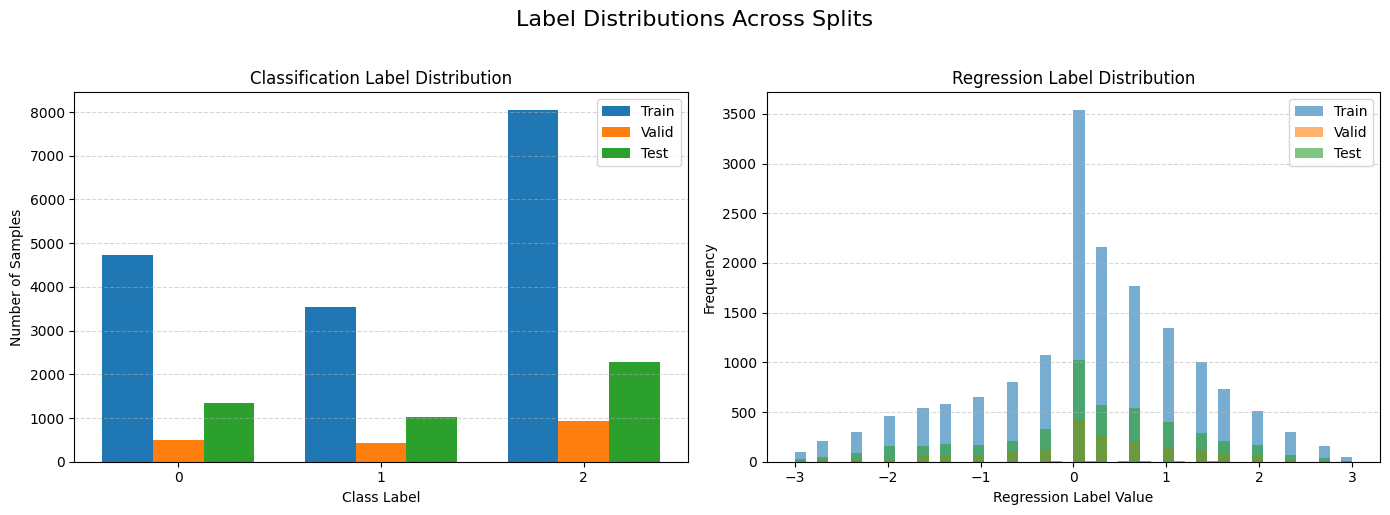

In [50]:
def plot_all_label_distributions(pkl_path='aligned_50.pkl'):
    # --- load data ---
    with open(pkl_path, 'rb') as f:
        data = pickle.load(f)

    splits = ['train', 'valid', 'test']

    # Extract & prepare label arrays
    class_labels = [
        np.rint(data[s]['classification_labels']).astype(int)
        for s in splits
    ]
    reg_labels = [
        np.array(data[s]['regression_labels'], dtype=float)
        for s in splits
    ]

    # Prepare for classification bar chart
    max_class = max(lbl.max() for lbl in class_labels)
    class_counts = [
        np.bincount(lbl, minlength=max_class+1)
        for lbl in class_labels
    ]
    classes = np.arange(max_class+1)
    width = 0.25
    x = np.arange(len(classes))

    # --- plot both in one figure ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # 1) Classification distribution (grouped bar)
    for i, split in enumerate(splits):
        ax1.bar(x + (i-1)*width, class_counts[i], width, label=split.capitalize())
    ax1.set_xticks(classes)
    ax1.set_xlabel('Class Label')
    ax1.set_ylabel('Number of Samples')
    ax1.set_title('Classification Label Distribution')
    ax1.legend()
    ax1.grid(axis='y', linestyle='--', alpha=0.5)

    # 2) Regression distribution (overlaid histograms)
    for split, reg in zip(splits, reg_labels):
        ax2.hist(reg, bins=50, alpha=0.6, label=split.capitalize(), density=False)
    ax2.set_xlabel('Regression Label Value')
    ax2.set_ylabel('Frequency')
    ax2.set_title('Regression Label Distribution')
    ax2.legend()
    ax2.grid(axis='y', linestyle='--', alpha=0.5)

    plt.suptitle('Label Distributions Across Splits', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


if __name__ == '__main__':
    plot_all_label_distributions('aligned_50.pkl')